In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib.pyplot as plt 
import numpy as np
import torch
from heconv_tests import load_dict, load_img, compare_conv1

Load ORG Pytorch model

In [4]:
from load_test_model import get_test_model

org_model = get_test_model()
img_tensor = load_img("./bird6.png")
print(img_tensor.shape)

# Load trained parameters
load_dict(org_model, fn_param = "SimpleCNN_ReLU_minimax_v2.pt")

org_model.eval() ## If not eval(), running_mean and running_var of batch_norm changes

torch.Size([1, 3, 32, 32])


ConvNeuralNet(
  (conv_layer1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv_layer2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv_layer3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (conv_layer4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (conv_layer5): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=1024, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

#### f_conv is the fhe-friendly function which is expected to take a 4D torch tensor image

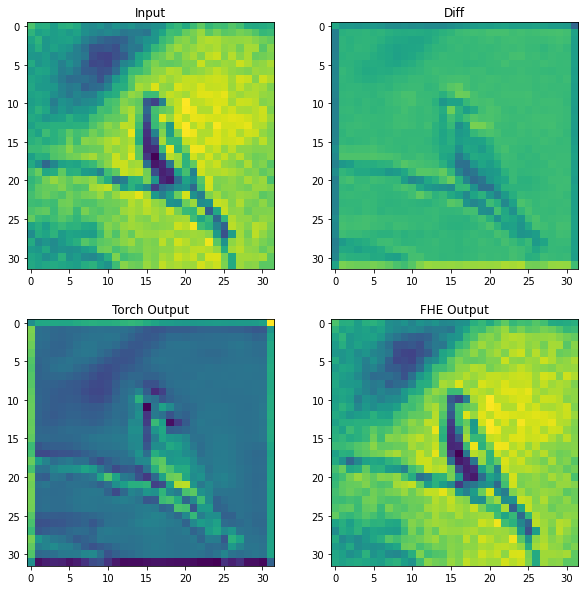

In [5]:
def f_conv(img_tensor):
    """테스트용 임시함수"""
    img_tensor *= 0.1
    img_tensor += np.random.random(img_tensor.shape)*0.01
    return img_tensor

compare_conv1(org_model, f_conv, img_tensor)